# <h1><center><font color=darkblue>Project P160 - Group 2</font></center></h1>
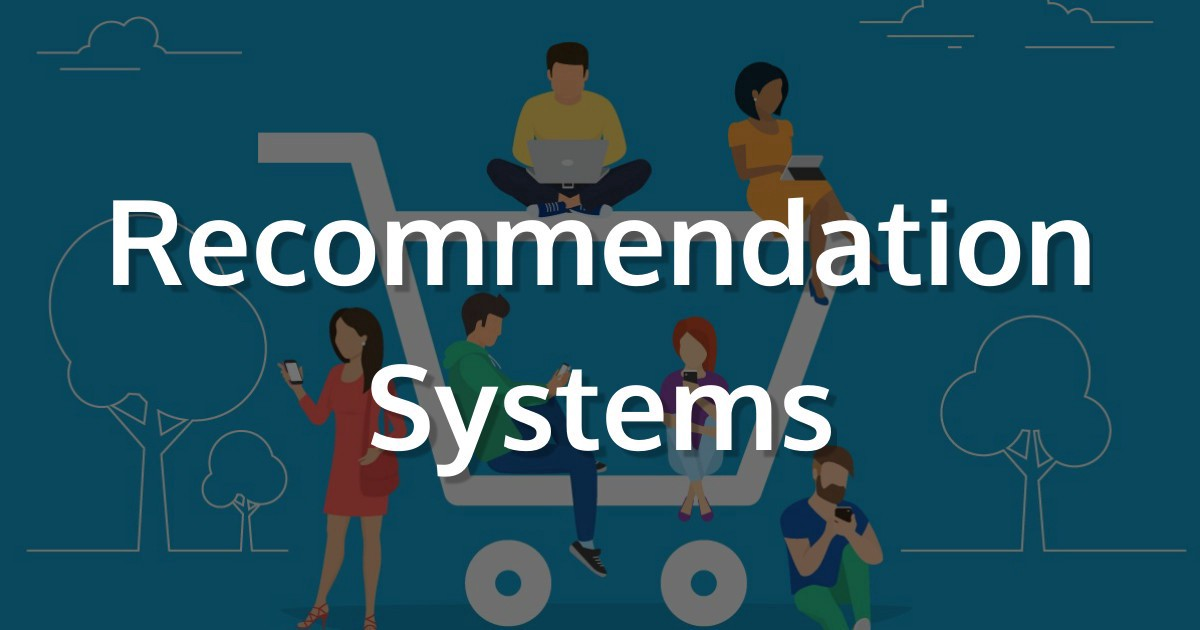

## <h1><center><font color=darkgreen>Business Objective</font></center></h1>
#### <h1><center>Generate the features from the dataset and use them to recommend the books according to the users.</center></h1>

Sample Data Set Details:<br><br>1. Users :It contains user ID’s have been anonymized and map to integers, demographic data is provided (location, age if available) otherwise this fields    contain null values.<br>2. Books :Books are identified by their respective ISBN.<br>3. Ratings :It contains book rating information. Ratings are either explicit, expressed on a scale from 1 to 10, Or implicit expressed by 0.

## <h1><center><font color=darkgreen>Importing Libraries</font></center></h1>

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from sklearn.metrics.pairwise import cosine_similarity
from pandas_profiling import ProfileReport
import streamlit as st
import pickle

## <h1><center><font color=darkgreen>Importing Datasets</font></center></h1>

In [4]:
book = pd.read_csv('Books.csv',low_memory=False)
book.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [5]:
Rating = pd.read_csv('Ratings.csv')
Rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
User = pd.read_csv('Users.csv')
User.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [7]:
print( "Shape of Books",book.shape)
print( "Shape of Users",User.shape)
print( "Shape of Ratings",Rating.shape)

Shape of Books (271360, 8)
Shape of Users (278858, 3)
Shape of Ratings (1149780, 3)


## <h1><center><font color=darkgreen>Books dataset Insights</font></center></h1>

In [8]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# % null values in book datasets
print("Total Percentage of Null ISBN in Books dataset:",round((book['ISBN'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Book-Title in Books dataset:",round((book['Book-Title'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Book-Author in Books dataset:",round((book['Book-Author'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Year-Of-Publication in Books dataset:",round((book['Year-Of-Publication'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Publisher in Books dataset:",round((book['Publisher'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Image-URL-S in Books dataset:",round((book['Image-URL-S'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Image-URL-M in Books dataset:",round((book['Image-URL-M'].isnull().sum()/271360 *100),3),'%')
print("Total Percentage of Null Image-URL-L in Books dataset:",round((book['Image-URL-L'].isnull().sum()/271360 *100),3),'%')

Total Percentage of Null ISBN in Books dataset: 0.0 %
Total Percentage of Null Book-Title in Books dataset: 0.0 %
Total Percentage of Null Book-Author in Books dataset: 0.0 %
Total Percentage of Null Year-Of-Publication in Books dataset: 0.0 %
Total Percentage of Null Publisher in Books dataset: 0.001 %
Total Percentage of Null Image-URL-S in Books dataset: 0.0 %
Total Percentage of Null Image-URL-M in Books dataset: 0.0 %
Total Percentage of Null Image-URL-L in Books dataset: 0.001 %


<AxesSubplot:title={'center':'Heatmap for null values'}>

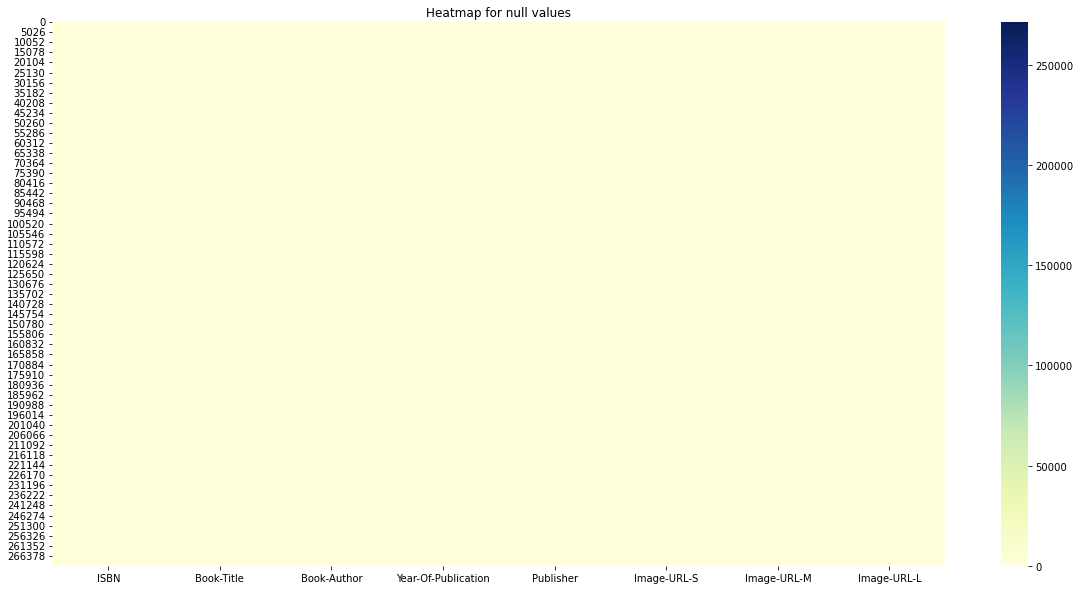

In [11]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values")
sns.heatmap(book.isnull(), cbar=True,cmap="YlGnBu",vmax= book.shape[0]) 

In [12]:
book = book.dropna()

In [13]:
book.shape #shape reduced by 6 rows

(271354, 8)

In [14]:
book[book.duplicated()] # No duplicated rows found

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


## <h1><center><font color=darkgreen>Ratings dataset Insights</font></center></h1>

In [15]:
Rating.shape

(1149780, 3)

In [16]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
Rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [18]:
# % null values in book datasets
print("Total Percentage of Null User-ID in Rating dataset:",round((Rating['User-ID'].isnull().sum()/1149780 *100),3),'%')
print("Total Percentage of Null ISBN in Rating dataset:",round((Rating['ISBN'].isnull().sum()/1149780 *100),3),'%')
print("Total Percentage of Null Book-Rating in Rating dataset:",round((Rating['Book-Rating'].isnull().sum()/1149780 *100),3),'%')

Total Percentage of Null User-ID in Rating dataset: 0.0 %
Total Percentage of Null ISBN in Rating dataset: 0.0 %
Total Percentage of Null Book-Rating in Rating dataset: 0.0 %


<AxesSubplot:title={'center':'Heatmap for null values'}>

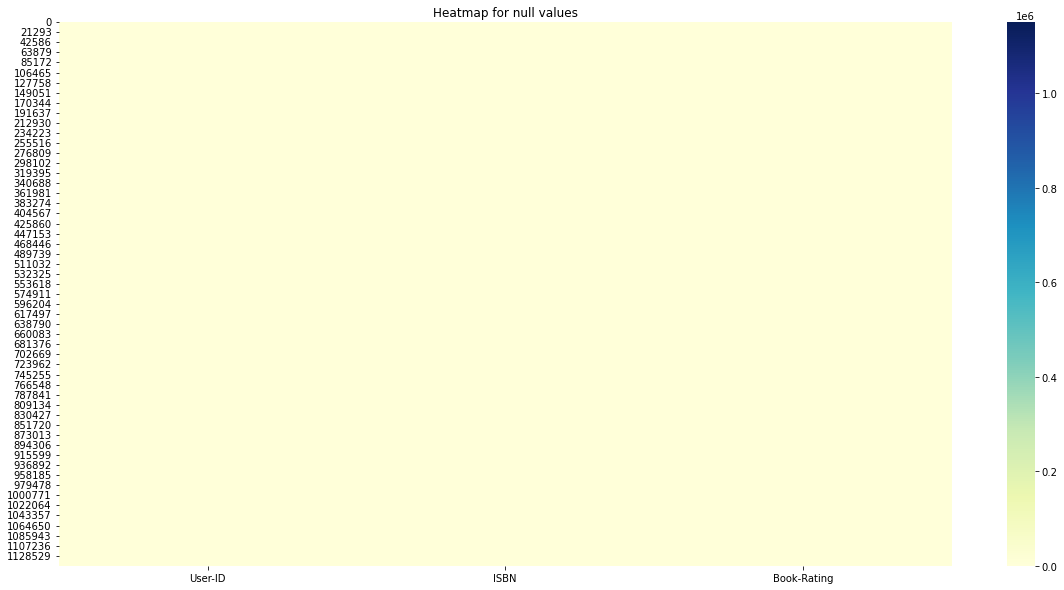

In [19]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values")
sns.heatmap(Rating.isnull(), cbar=True,cmap="YlGnBu",vmin= 0,vmax= Rating.shape[0])

In [20]:
Rating[Rating.duplicated()] # No duplicated rows found

,User-ID,ISBN,Book-Rating


## <h1><center><font color=darkgreen>Users Dataset Insights</font></center></h1>

In [21]:
User.shape

(278858, 3)

In [22]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [23]:
User.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [24]:
# % null values in book datasets
print("Total Percentage of Null User-ID in Users dataset:",round((User['User-ID'].isnull().sum()/278858 *100),3),'%')
print("Total Percentage of Null Location in Users dataset:",round((User['Location'].isnull().sum()/278858 *100),3),'%')
print("Total Percentage of Null Age in Rating Users:",round((User['Age'].isnull().sum()/278858 *100),3),'%')

Total Percentage of Null User-ID in Users dataset: 0.0 %
Total Percentage of Null Location in Users dataset: 0.0 %
Total Percentage of Null Age in Rating Users: 39.72 %


### Age contains 39.72% null values.

<AxesSubplot:title={'center':'Heatmap for null values'}>

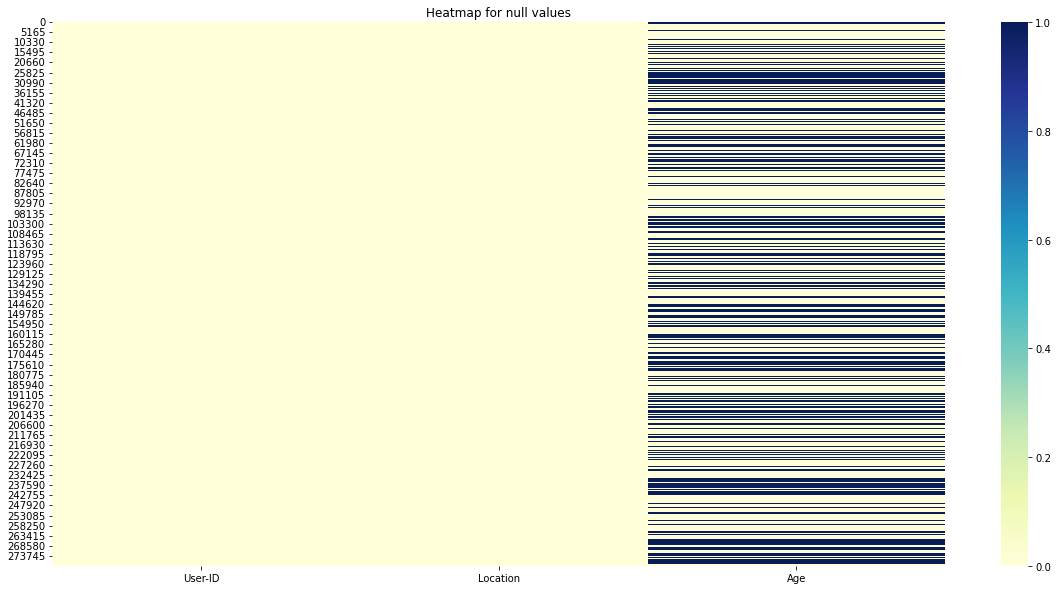

In [25]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values")
sns.heatmap(User.isnull(), cbar=True,cmap="YlGnBu")

### Dark blue horizontal lines represent null values in dataset.

In [26]:
User[User.duplicated()] # No duplicated rows found

,User-ID,Location,Age


## <h1><center><font color=darkgreen>Merging DataFrames</font></center></h1>
Merging all the above datasets(Books,Ratings,Users).<br><br>There are three different types of merges available in Pandas given below:-
1) Inner Merge / Inner join .<br>
2) Left Merge / Left join<br>
3) Right Merge / Right join<br>
4) Outer Merge / Full outer join 
<br> <font color=darkgreen>The merge type to use is specified using the “how” parameter in the merge command, taking values “left”, “right”, “inner” (default), or “outer”.</font>

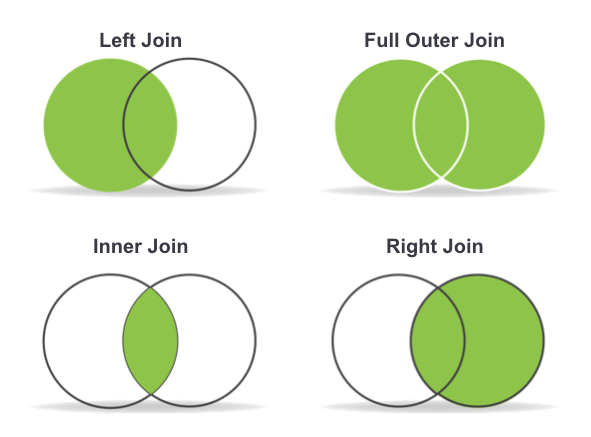
#### <h1><center><font color=darkgreen>Fig. Merge/Join types as used in Pandas.</font></center></h1>

In [27]:
outer_join = pd.merge(Rating, book, on ='ISBN',how= 'outer',indicator=True)
outer_join

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,_merge
0,276725.0,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,both
1,2313.0,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,both
2,6543.0,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,both
3,8680.0,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,both
4,10314.0,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,both
...,...,...,...,...,...,...,...,...,...,...,...
1150984,NaN,1874166633,NaN,Introducing Nietzsche (Foundations in Children...,Laurence Gane,1998,Natl Book Network,http://images.amazon.com/images/P/1874166633.0...,http://images.amazon.com/images/P/1874166633.0...,http://images.amazon.com/images/P/1874166633.0...,right_only
1150985,NaN,0130897930,NaN,Core Web Programming (2nd Edition),Marty Hall,2001,Prentice Hall PTR,http://images.amazon.com/images/P/0130897930.0...,http://images.amazon.com/images/P/0130897930.0...,http://images.amazon.com/images/P/0130897930.0...,right_only
1150986,NaN,020130998X,NaN,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,right_only
1150987,NaN,2268032019,NaN,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999,Editions du Rocher,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...,right_only


In [28]:
outer_join._merge.value_counts()

both          1031129
left_only      118651
right_only       1209
Name: _merge, dtype: int64

In [29]:
#unmmatched data betwen Ratings and Book dataset
mismatch = outer_join[outer_join._merge.isin(['left_only','right_only'])]
mismatch

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,_merge
183,276736.0,3257224281,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
184,86583.0,3257224281,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
185,119485.0,3257224281,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
186,198736.0,3257224281,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
187,262974.0,3257224281,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...
1150984,NaN,1874166633,NaN,Introducing Nietzsche (Foundations in Children...,Laurence Gane,1998,Natl Book Network,http://images.amazon.com/images/P/1874166633.0...,http://images.amazon.com/images/P/1874166633.0...,http://images.amazon.com/images/P/1874166633.0...,right_only
1150985,NaN,0130897930,NaN,Core Web Programming (2nd Edition),Marty Hall,2001,Prentice Hall PTR,http://images.amazon.com/images/P/0130897930.0...,http://images.amazon.com/images/P/0130897930.0...,http://images.amazon.com/images/P/0130897930.0...,right_only
1150986,NaN,020130998X,NaN,The Unified Modeling Language Reference Manual...,James Rumbaugh,1998,Addison-Wesley Professional,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,http://images.amazon.com/images/P/020130998X.0...,right_only
1150987,NaN,2268032019,NaN,Petite histoire de la dÃ?Â©sinformation,Vladimir Volkoff,1999,Editions du Rocher,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...,http://images.amazon.com/images/P/2268032019.0...,right_only


In [30]:
mismatch.isnull().sum()

User-ID                  1209
ISBN                        0
Book-Rating              1209
Book-Title             118651
Book-Author            118651
Year-Of-Publication    118651
Publisher              118651
Image-URL-S            118651
Image-URL-M            118651
Image-URL-L            118651
_merge                      0
dtype: int64

<AxesSubplot:title={'center':'Heatmap for null values in merged dataset'}>

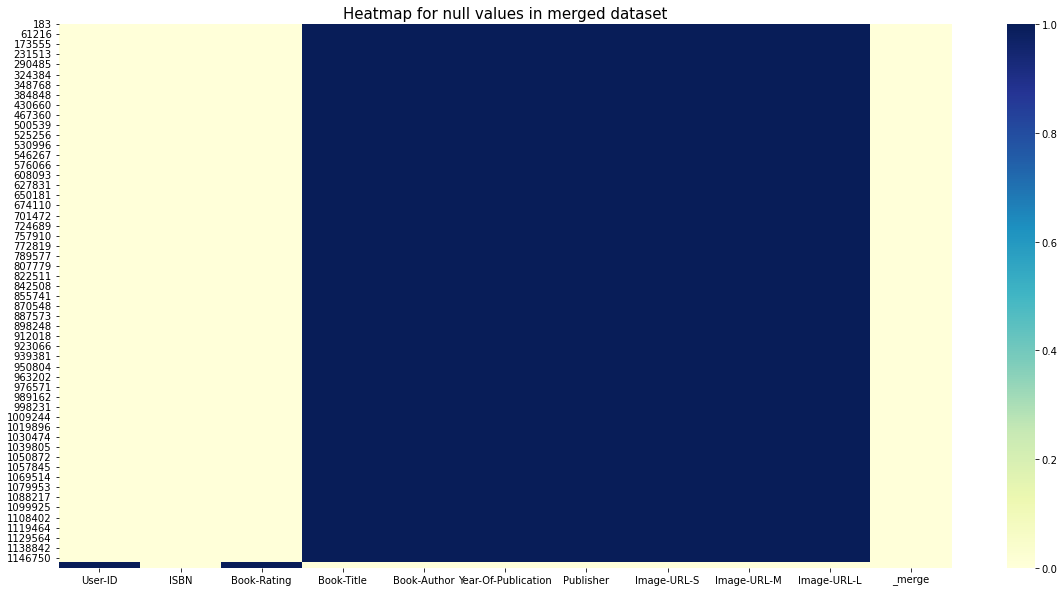

In [31]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values in merged dataset",fontsize = 15)
sns.heatmap(mismatch.isnull(), cbar=True,cmap="YlGnBu")

In [32]:
df = {'Data':["Inner Join Dataset","Outer Join Datset ","Left Only","Right Only" ,"Left  + Right","Both (Intersect)"],
      'Total Entries':["1031129","1150989","118651","1209","119860","1031129",]}
Table = pd.DataFrame(df)
Table.set_index('Data',inplace=True)
Table

,Total Entries
Data,
Inner Join Dataset,1031129
Outer Join Datset,1150989
Left Only,118651
Right Only,1209
Left + Right,119860
Both (Intersect),1031129


### Left only and Right only is the data which is not similar in both datasets.
### As we will consider only intersecting data ,i.e. Inner join, Left + Right data will be dropped.
### 119860 entries will be dropped while merging.

In [33]:
#Inner join between ratings and book dataset
inner_join = pd.merge(Rating, book, on ='ISBN',how= 'inner')
inner_join

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031124,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031125,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031126,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031127,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [34]:
#Inner join between inner_join and Users dataset
inner_join1 = pd.merge(inner_join, User, on ='User-ID')
inner_join1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031124,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0
1031125,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN
1031126,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0
1031127,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0


### While merging Users dataset with inner_join (Ratings+Book) dataset, we observed that there is no data loss.

## <h1><center><font color=darkgreen>Exploratory Data Analysis (EDA) on Merged Dataset</font></center></h1>

In [35]:
inner_join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031129 non-null  int64  
 1   ISBN                 1031129 non-null  object 
 2   Book-Rating          1031129 non-null  int64  
 3   Book-Title           1031129 non-null  object 
 4   Book-Author          1031129 non-null  object 
 5   Year-Of-Publication  1031129 non-null  object 
 6   Publisher            1031129 non-null  object 
 7   Image-URL-S          1031129 non-null  object 
 8   Image-URL-M          1031129 non-null  object 
 9   Image-URL-L          1031129 non-null  object 
 10  Location             1031129 non-null  object 
 11  Age                  753296 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [36]:
round(inner_join1.describe())

,User-ID,Book-Rating,Age
count,1031129.0,1031129.0,753296.0
mean,140595.0,3.0,37.0
std,80525.0,4.0,14.0
min,2.0,0.0,0.0
25%,70415.0,0.0,28.0
50%,141210.0,0.0,35.0
75%,211426.0,7.0,45.0
max,278854.0,10.0,244.0


In [37]:
inner_join1.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 0
Location                    0
Age                    277833
dtype: int64

### Age coloumn consists of 277833 null values,which is unacceptable.So, replacing Null age values with mean.

In [38]:
mean_value=inner_join1['Age'].mean()
inner_join1['Age'].fillna(value = mean_value, inplace=True)
inner_join1.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

In [39]:
inner_join1[inner_join1.duplicated()] #no duplicates found

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age


In [40]:
#Number of unique entries in the dataset
print('Number of uniques User-IDs:',len(inner_join1["User-ID"].unique()))
print('Number of uniques Book-Title:',len(inner_join1["Book-Title"].unique()))

Number of uniques User-IDs: 92106
Number of uniques Book-Title: 241066


In [41]:
#np.set_printoptions(threshold=np.inf)
inner_join1['Year-Of-Publication'].unique()

array(['2002', '1986', '1994', '1996', '1998', '2001', '1987', '1984',
       '1997', '1970', '1978', '1993', '1989', '1995', '1990', '1992',
       '1950', '1991', '1999', '1954', '1988', '2003', '2004', '2000',
       '1983', '1985', '1982', '1956', '1979', '1975', '0', '1976',
       '1981', '1977', '1980', '1974', '1957', '1958', '1960', '1963',
       '1969', '1972', '1961', '1971', '1953', '1968', '1973', '1967',
       '1962', '1937', '1959', '1955', '1946', '2005', '1945', '1965',
       '1964', '1927', '2020', '2050', '1920', '1966', '1952', '1930',
       '1940', '1942', '1947', '1925', '1948', '1923', '2030', '1951',
       '2021', '1941', '1932', '2011', '1901', '2038', '1929', '1943',
       '1936', '1928', '1939', '1944', '1938', '1902', '1900', '1911',
       '1949', '1906', '1806', '1933', '1935', '1926', '1922', '1897',
       '2026', '2006', '2037', '1924', '1921', '2024', '1378', '2008',
       '2010', '1934', '1909', '1931', '1904', '1910', '1917', '2012',
       '1

In [42]:
(inner_join1.loc[inner_join1['Year-Of-Publication']== '0'])

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
219,6543,014003613X,0,Down Among the Women,Fay Weldon,0,Penguin Putnam~trade,http://images.amazon.com/images/P/014003613X.0...,http://images.amazon.com/images/P/014003613X.0...,http://images.amazon.com/images/P/014003613X.0...,"strafford, missouri, usa",34.000000
383,6543,0718146298,0,Visions of Sugar Plums,Janet Evanovich,0,Penguin Books Australia Ltd,http://images.amazon.com/images/P/0718146298.0...,http://images.amazon.com/images/P/0718146298.0...,http://images.amazon.com/images/P/0718146298.0...,"strafford, missouri, usa",34.000000
422,6543,0880299193,0,Jeeves Omnibus,P G Wodehouse,0,Dorset House Publishing Co Inc,http://images.amazon.com/images/P/0880299193.0...,http://images.amazon.com/images/P/0880299193.0...,http://images.amazon.com/images/P/0880299193.0...,"strafford, missouri, usa",34.000000
456,6543,1850514496,7,Collecting Art Nouveau,Philippe Garner,0,Treasure Press,http://images.amazon.com/images/P/1850514496.0...,http://images.amazon.com/images/P/1850514496.0...,http://images.amazon.com/images/P/1850514496.0...,"strafford, missouri, usa",34.000000
477,8680,0340551194,0,Time to Dance,Melvyn Bragg,0,Scepter Pubs,http://images.amazon.com/images/P/0340551194.0...,http://images.amazon.com/images/P/0340551194.0...,http://images.amazon.com/images/P/0340551194.0...,"st. charles county, missouri, usa",2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1031018,271737,0749000406,7,Yours,Philip Callow,0,Allison Busby,http://images.amazon.com/images/P/0749000406.0...,http://images.amazon.com/images/P/0749000406.0...,http://images.amazon.com/images/P/0749000406.0...,"brooklyn, new york, usa",26.000000
1031026,272386,0140071261,7,Bernard Malamud Selected Stories,Bernard Malamud,0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140071261.0...,http://images.amazon.com/images/P/0140071261.0...,http://images.amazon.com/images/P/0140071261.0...,"rotorua, n/a, new zealand",60.000000
1031034,272538,9578890249,0,She hui ke xue yan jiu fang fa,Earl R Babbie,0,Shi ying chu ban she,http://images.amazon.com/images/P/9578890249.0...,http://images.amazon.com/images/P/9578890249.0...,http://images.amazon.com/images/P/9578890249.0...,"taipei, taipei, taiwan",31.000000
1031102,275667,8807811073,7,Garzanti - Gli Elefanti: Il Giudice E Il Suo Boia,F Durrenmatt,0,Feltrinelli,http://images.amazon.com/images/P/8807811073.0...,http://images.amazon.com/images/P/8807811073.0...,http://images.amazon.com/images/P/8807811073.0...,"montespertoli, toscana, italy",19.000000


In [43]:
# Remove rows with all 0s in a Dataframe
inner_join1 = inner_join1.loc[(inner_join1['Year-Of-Publication'] != '0')]

### Year-Of-Publication contains 14009 Zero values.

## <h1><center><font color=darkgreen>Data Visualization</font><br></center></h1>

<AxesSubplot:title={'center':'Heatmap for null values in merged dataset'}>

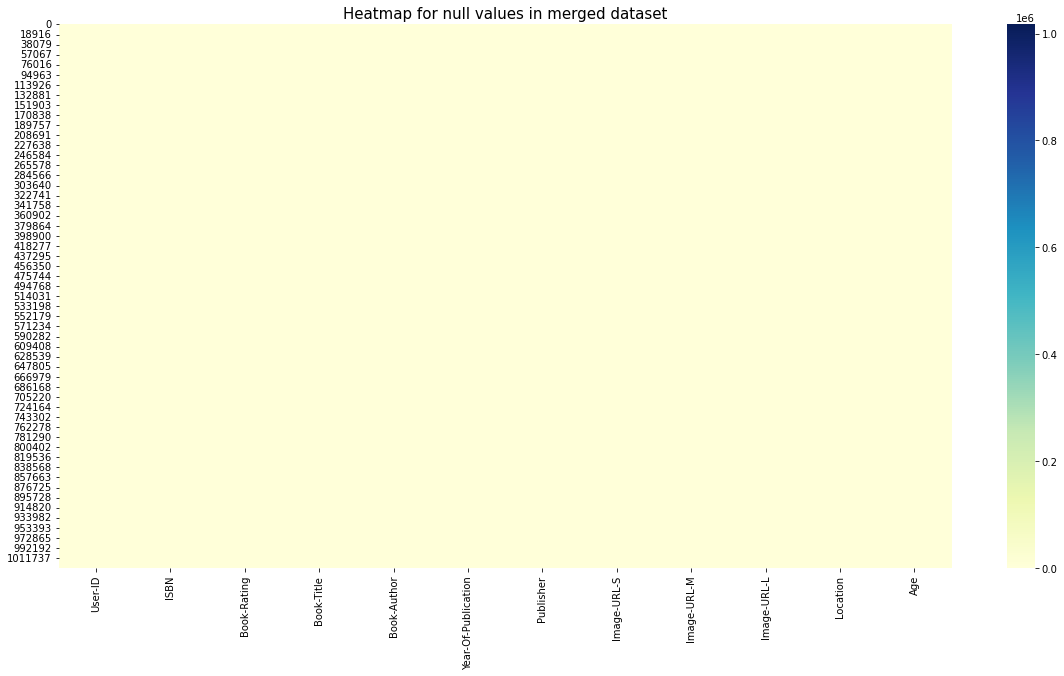

In [45]:
# Heatmap for null values
plt.figure(figsize=(20,10))
plt.title("Heatmap for null values in merged dataset",fontsize = 15)
sns.heatmap(inner_join1.isnull(), cbar=True,cmap="YlGnBu",vmin= 0 , vmax = inner_join1.shape[0])

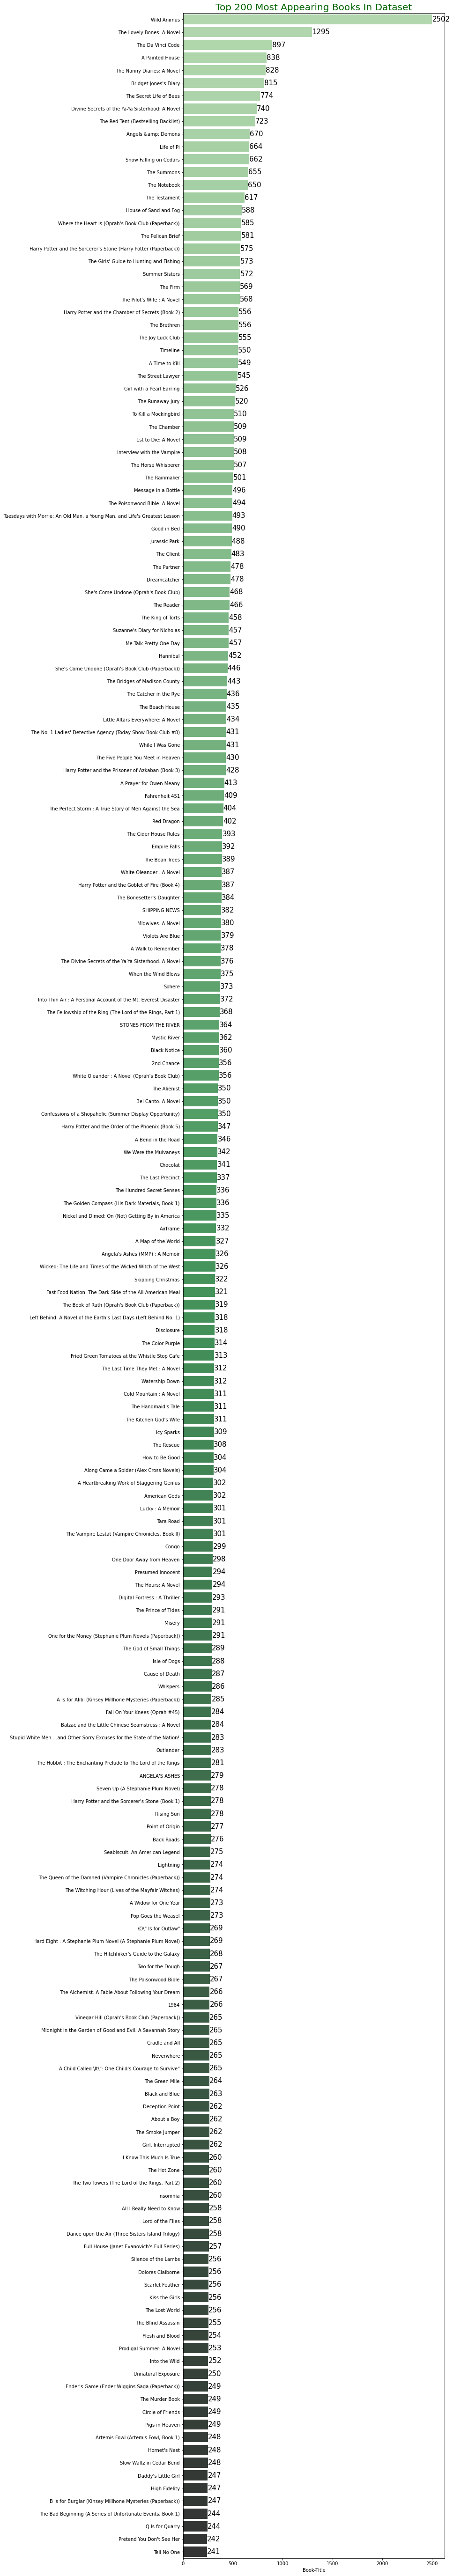

In [46]:
plt.figure(figsize=(10,100))
ax = sns.barplot(x= inner_join1['Book-Title'].value_counts().iloc[0:200],y =inner_join1['Book-Title'].value_counts().iloc[0:200].index
           ,palette = "Greens_d")
ax.bar_label(ax.containers[0],fontsize = 15)

plt.title("Top 200 Most Appearing Books In Dataset"
          ,color = "darkGreen",fontsize = 20)
plt.show()


In [47]:
#dropping 0 ratings for visualization
inner_join1_null = inner_join1[inner_join1['Book-Rating'] != 0]
inner_join1_null.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,"cincinnati, ohio, usa",23.0


In [48]:
inner_join1_null.shape

(378055, 12)

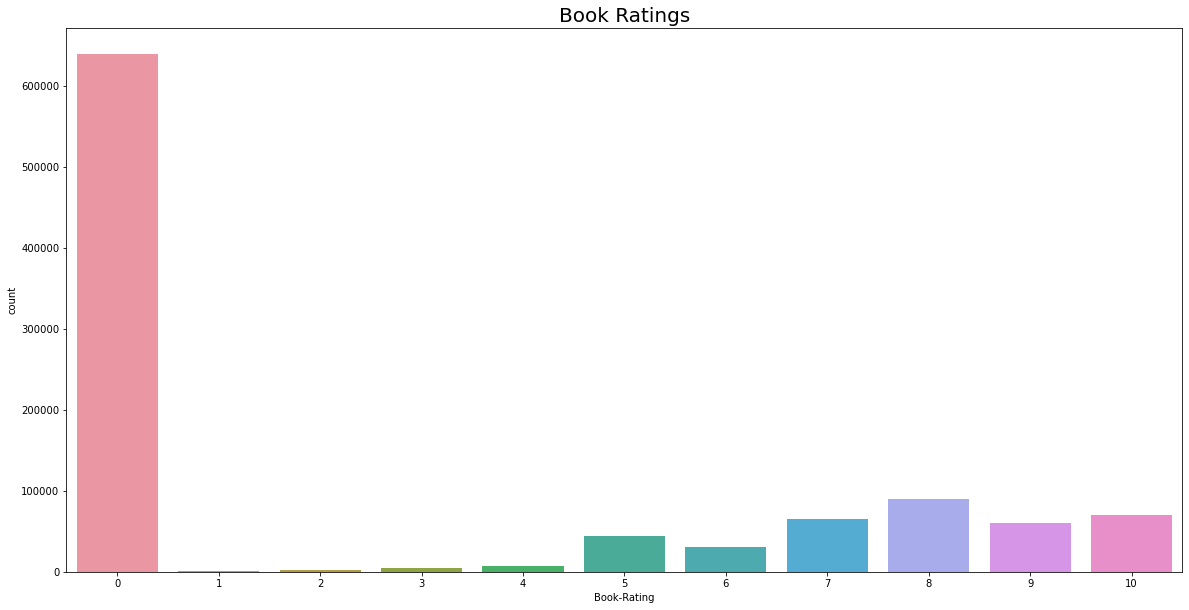

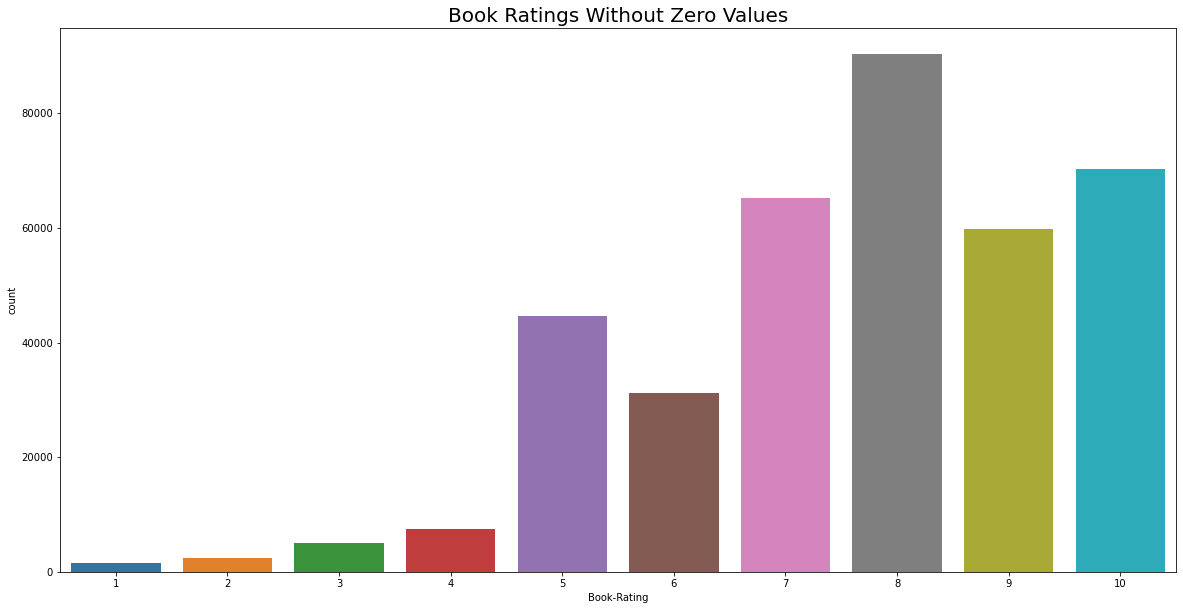

In [49]:
#Book ratings  0-10
plt.figure(figsize=(20,10))
sns.countplot(x= inner_join1['Book-Rating'])
plt.title("Book Ratings"
          ,fontsize = 20)

#Book ratings  1-10
plt.show()
plt.figure(figsize=(20,10))
plt.title("Book Ratings Without Zero Values"
          ,fontsize = 20)
sns.countplot(x= inner_join1_null['Book-Rating'])
plt.show()


In [50]:
round(inner_join1.describe())

,User-ID,Book-Rating,Age
count,1017120.0,1017120.0,1017120.0
mean,140640.0,3.0,37.0
std,80508.0,4.0,12.0
min,2.0,0.0,0.0
25%,70415.0,0.0,31.0
50%,141434.0,0.0,37.0
75%,211426.0,7.0,41.0
max,278854.0,10.0,244.0


In [51]:
#dropping n/a ratings in Location for visualization
location_null = inner_join1[inner_join1['Location'] != 'n/a, n/a, n/a']
location_null

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",37.397658
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.000000
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.000000
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.000000
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1031124,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.000000
1031125,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",37.397658
1031126,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.000000
1031127,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.000000


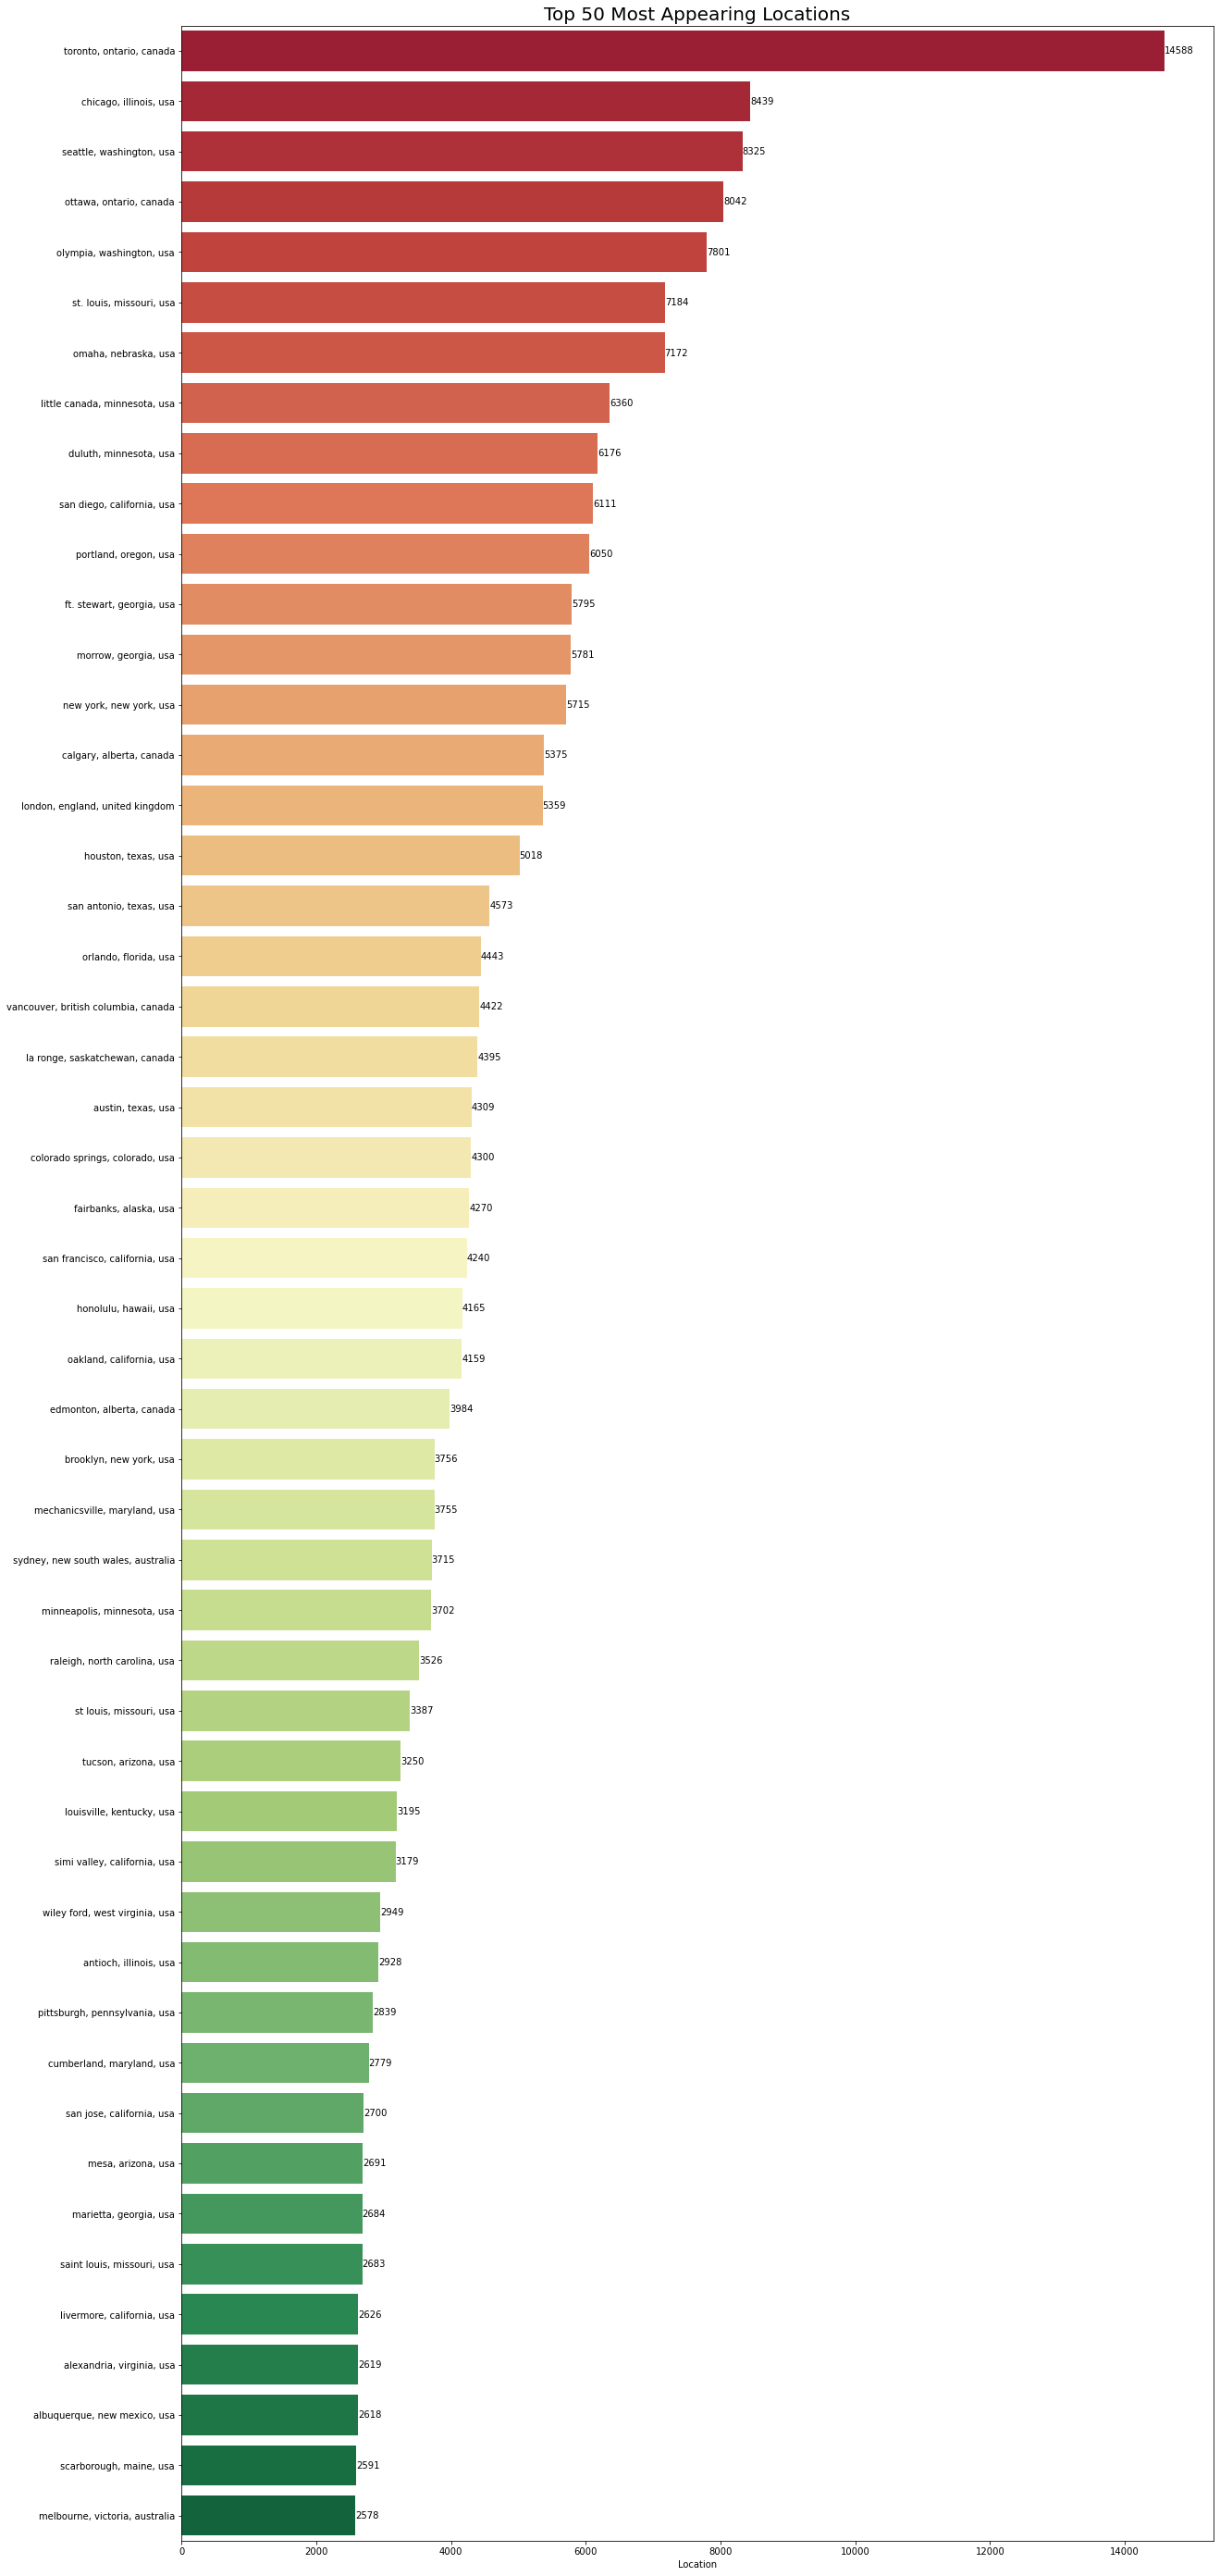

In [52]:
plt.figure(figsize=(20,50))
ax = sns.barplot(x= location_null['Location'].value_counts().iloc[0:50],y =location_null['Location'].value_counts().iloc[0:50].index
           ,palette = "RdYlGn")
ax.bar_label(ax.containers[0],fontsize = 10)
plt.title("Top 50 Most Appearing Locations",fontsize = 20)
plt.show()

## <h1><center><font color=darkgreen>Pivot Table</font><br></center></h1>

In [53]:
# Total ratings for each book
num_rating= inner_join1_null.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
133372,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
133373,Ã?Â?rger mit Produkt X. Roman.,3
133374,Ã?Â?sterlich leben.,1
133375,Ã?Â?stlich der Berge.,1


In [54]:
#High Rated Books 
avg_rating = inner_join1_null.groupby('Book-Title').mean()['Book-Rating'].round(1).reset_index()
avg_rating.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
2,Dark Justice,10.0
3,Earth Prayers From around the World: 365 Pray...,7.1
4,Final Fantasy Anthology: Official Strategy Gu...,10.0
...,...,...
133372,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.0
133373,Ã?Â?rger mit Produkt X. Roman.,7.0
133374,Ã?Â?sterlich leben.,7.0
133375,Ã?Â?stlich der Berge.,8.0


In [55]:
popular_book = num_rating.merge(avg_rating,on='Book-Title')
popular_book

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
2,Dark Justice,1,10.0
3,Earth Prayers From around the World: 365 Pray...,7,7.1
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.0
...,...,...,...
133372,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.0
133373,Ã?Â?rger mit Produkt X. Roman.,3,7.0
133374,Ã?Â?sterlich leben.,1,7.0
133375,Ã?Â?stlich der Berge.,1,8.0


In [56]:
#Filtering out those books which have total ratings equal to or more than 50.
popular_book= popular_book[popular_book['num_ratings']>=50].sort_values('avg_rating',ascending=False)
popular_book


,Book-Title,num_ratings,avg_rating
117109,"The Two Towers (The Lord of the Rings, Part 2)",136,9.3
113182,"The Return of the King (The Lord of the Rings,...",103,9.2
44497,Harry Potter and the Goblet of Fire (Book 4),247,9.1
18701,Charlotte's Web (Trophy Newbery),68,9.1
44516,Harry Potter and the Sorcerer's Stone (Book 1),176,9.1
...,...,...,...
89834,Songs in Ordinary Time (Oprah's Book Club (Pap...,66,6.5
717,4 Blondes,52,5.7
52041,Isle of Dogs,106,5.4
38836,Four Blondes,66,5.4


In [57]:
# Merging Number of ratings of each book with Original merged dataset again
final_rating = popular_book.merge(inner_join1_null,on='Book-Title')
final_rating.head(2)

,Book-Title,num_ratings,avg_rating,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.3,138543,0345339711,10,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,"mesquite, texas, usa",21.0
1,"The Two Towers (The Lord of the Rings, Part 2)",136,9.3,208406,0618002235,10,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,"kansas city, missouri, usa",30.0


In [58]:
#final_rating.uniqe()
len(final_rating["Book-Title"].unique())

645

In [59]:
final_book =final_rating.drop_duplicates('Book-Title')
final_book

,Book-Title,num_ratings,avg_rating,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.3,138543,0345339711,10,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,"mesquite, texas, usa",21.000000
136,"The Return of the King (The Lord of the Rings,...",103,9.2,138543,0345339738,10,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,"mesquite, texas, usa",21.000000
239,Harry Potter and the Goblet of Fire (Book 4),247,9.1,195374,0439139597,10,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,"navarre, florida, usa",51.000000
486,Charlotte's Web (Trophy Newbery),68,9.1,244420,0064400557,10,E. B. White,1974,HarperTrophy,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...,"kenmore, ,",37.397658
554,Harry Potter and the Sorcerer's Stone (Book 1),176,9.1,28523,0590353403,10,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,"springfield, missouri, usa",24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64135,Songs in Ordinary Time (Oprah's Book Club (Pap...,66,6.5,187863,0140244824,7,Mary McGarry Morris,1996,Penguin Books,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...,http://images.amazon.com/images/P/0140244824.0...,"greenwood, south carolina, usa",33.000000
64201,4 Blondes,52,5.7,260897,0451203895,6,Candace Bushnell,2002,Signet Book,http://images.amazon.com/images/P/0451203895.0...,http://images.amazon.com/images/P/0451203895.0...,http://images.amazon.com/images/P/0451203895.0...,"chicago, illinois, usa",25.000000
64253,Isle of Dogs,106,5.4,98391,039914739X,9,Patricia Daniels Cornwell,2001,Putnam Publishing Group,http://images.amazon.com/images/P/039914739X.0...,http://images.amazon.com/images/P/039914739X.0...,http://images.amazon.com/images/P/039914739X.0...,"morrow, georgia, usa",52.000000
64359,Four Blondes,66,5.4,11676,080213825X,3,Candace Bushnell,2001,Grove Press,http://images.amazon.com/images/P/080213825X.0...,http://images.amazon.com/images/P/080213825X.0...,http://images.amazon.com/images/P/080213825X.0...,"n/a, n/a, n/a",37.397658


In [74]:
top25 = final_book.sort_values('num_ratings',ascending=False).head(25)
top25

,Book-Title,num_ratings,avg_rating,User-ID,ISBN,Book-Rating,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
14103,The Lovely Bones: A Novel,707,8.2,23768,0316666343,7,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"st. louis, missouri, usa",45.000000
64425,Wild Animus,581,4.4,63970,0971880107,8,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"springfield, missouri, usa",37.397658
8171,The Da Vinci Code,494,8.4,81977,0385504209,9,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"minneapolis, minnesota, usa",34.000000
5671,The Secret Life of Bees,406,8.5,6543,0142001740,9,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,"strafford, missouri, usa",34.000000
53860,The Nanny Diaries: A Novel,393,7.4,28523,0312278586,10,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,http://images.amazon.com/images/P/0312278586.0...,"springfield, missouri, usa",24.000000
15972,The Red Tent (Bestselling Backlist),383,8.2,10314,0312195516,9,Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,"beaverton, oregon, usa",37.397658
41267,Bridget Jones's Diary,377,7.6,138543,0141000198,7,Helen Fielding,2001,Penguin Putnam,http://images.amazon.com/images/P/0141000198.0...,http://images.amazon.com/images/P/0141000198.0...,http://images.amazon.com/images/P/0141000198.0...,"mesquite, texas, usa",21.000000
55030,A Painted House,366,7.4,115435,038550120X,8,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"cincinnati, ohio, usa",30.000000
17348,Life of Pi,336,8.1,98391,0151008116,9,Yann Martel,2002,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,"morrow, georgia, usa",52.000000
2642,Harry Potter and the Chamber of Secrets (Book 2),326,8.8,28523,0439064872,10,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,"springfield, missouri, usa",24.000000


In [60]:
# Building pivot table 
book_pivot=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
book_pivot

User-ID,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wuthering Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Filling null values with 0
book_pivot.fillna(0,inplace = True)
book_pivot

User-ID,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <h1><center><font color=darkgreen>Model Building Using Collaborative filtering</font><br></center></h1>


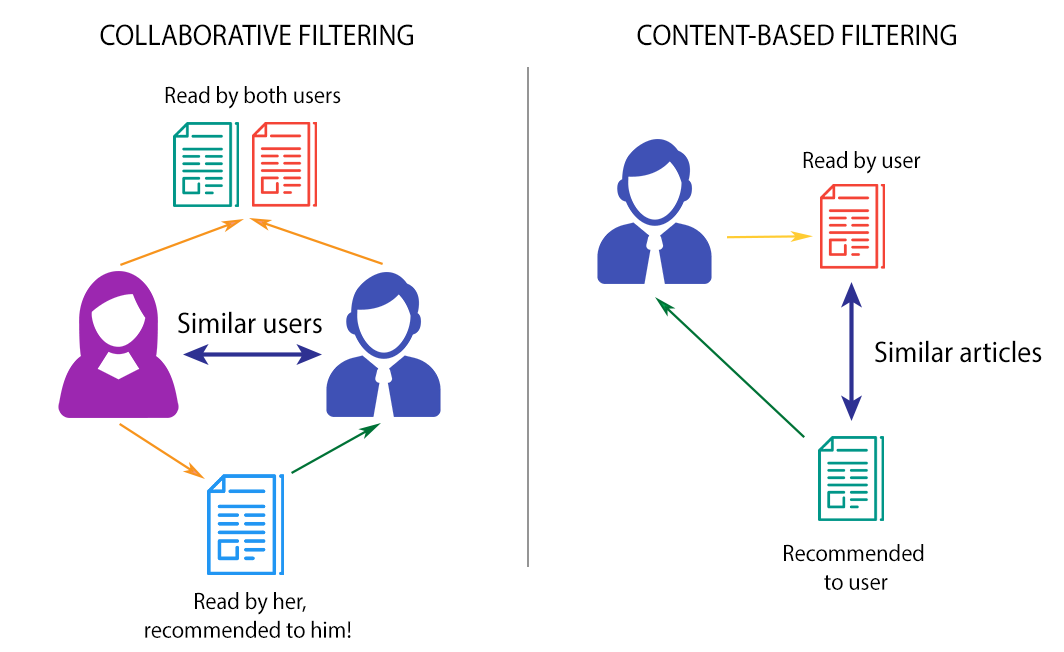

In [62]:
#checking similarity for books
similarity_scores = cosine_similarity(book_pivot)

In [63]:
similarity_scores.shape

(645, 645)

In [64]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_rating[final_rating['Book-Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

## <h1><center><font color=darkgreen>Model Prediction</font><br></center></h1>

In [65]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg']]

In [66]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060929871.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut',
  'http://images.amazon.com/images/P/0440180295.01.MZZZZZZZ.jpg'],
 ['American Psycho (Vintage Contemporaries)',
  'Bret Easton Ellis',
  'http://images.amazon.com/images/P/0679735771.01.MZZZZZZZ.jpg']]

In [67]:
recommend('Zen and the Art of Motorcycle Maintenance: An Inquiry into Values')

[['Atlas Shrugged',
  'Ayn Rand',
  'http://images.amazon.com/images/P/0451191145.01.MZZZZZZZ.jpg'],
 ["Foucault's Pendulum",
  'Umberto Eco',
  'http://images.amazon.com/images/P/0345368754.01.MZZZZZZZ.jpg'],
 ['Prodigal Summer',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060199652.01.MZZZZZZZ.jpg'],
 ['Rebecca',
  'Daphne du Maurier',
  'http://images.amazon.com/images/P/0385043805.01.MZZZZZZZ.jpg'],
 ['Pet Sematary',
  'Stephen King',
  'http://images.amazon.com/images/P/0451139755.01.MZZZZZZZ.jpg']]

In [68]:
recommend('Message in a Bottle')

[['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446520802.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446525502.01.MZZZZZZZ.jpg'],
 ['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446525537.01.MZZZZZZZ.jpg'],
 ['The Guardian',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446527793.01.MZZZZZZZ.jpg']]

In [69]:
book_pivot.index[54]

'At Home in Mitford (The Mitford Years)'

In [70]:
book_pivot.index[545]

'The Reader'

## <h1><center><font color=darkgreen>Model Deployment</font><br></center></h1>

In [75]:
pickle.dump(top25,open('popular.pkl','wb'))


In [76]:
pickle.dump(book_pivot,open('pt.pkl','wb'))


In [77]:
pickle.dump(book,open('books.pkl','wb'))


In [78]:
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
